In [2]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

In [3]:
df = pd.read_csv("Wine_RegionColor.csv")
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,Wine Region,Wine Color
0,7.5,0.33,0.32,11.1,0.036,25.0,119.0,0.99620,3.15,0.34,10.5,6,Terras De Cister,Rose
1,6.3,0.27,0.29,12.2,0.044,59.0,196.0,0.99782,3.14,0.40,8.8,6,Alentejo,Red
2,7.0,0.30,0.51,13.6,0.050,40.0,168.0,0.99760,3.07,0.52,9.6,7,Alentejo,Red
3,7.4,0.38,0.27,7.5,0.041,24.0,160.0,0.99535,3.17,0.43,10,5,Setubal,White
4,8.1,0.12,0.38,0.9,0.034,36.0,86.0,0.99026,2.80,0.55,12,6,Terras De Cister,Red


In [4]:
#cant pass "alcohol" column through linear regression function because it is "object" type
df.dtypes

fixed_acidity           float64
volatile_acidity        float64
citric_acid             float64
residual_sugar          float64
chlorides               float64
free_sulfur_dioxide     float64
total_sulfur_dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                  object
quality                   int64
Wine Region              object
Wine Color               object
dtype: object

In [5]:
df.columns[0:10]

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates'],
      dtype='object')

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


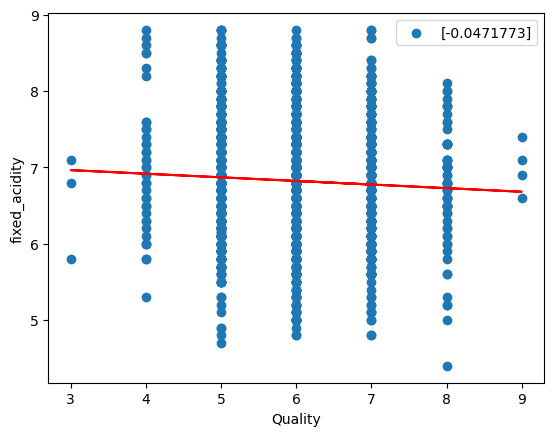

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


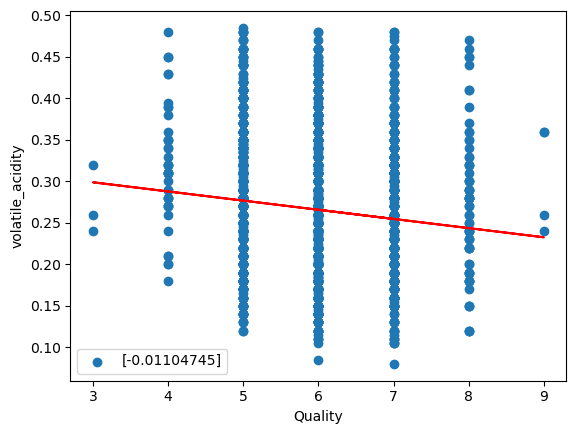

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


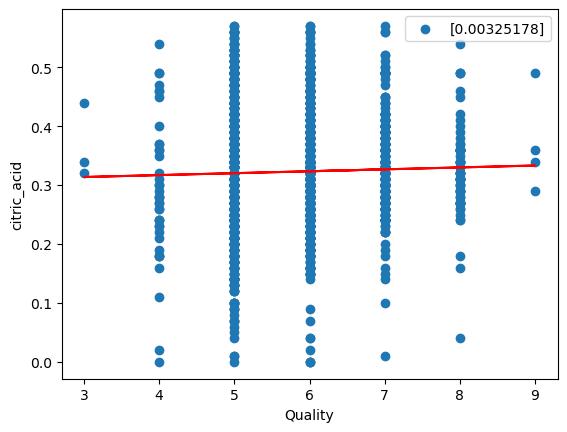

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


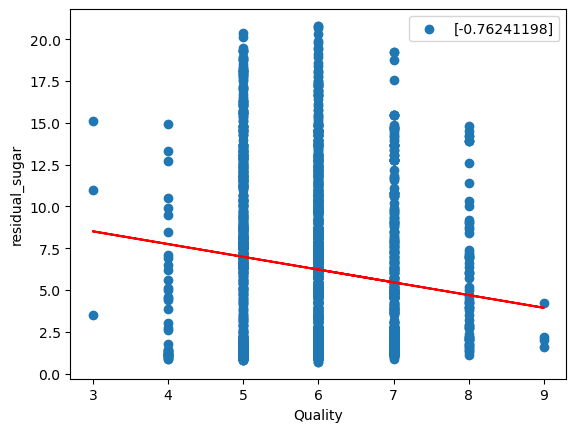

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


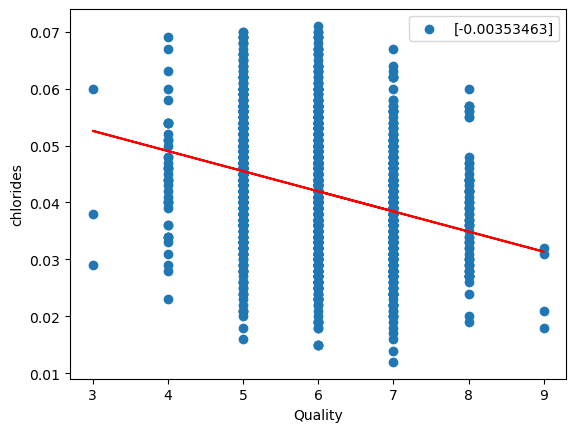

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


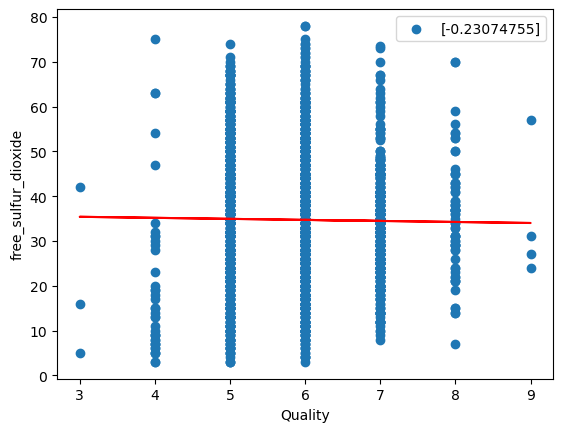

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


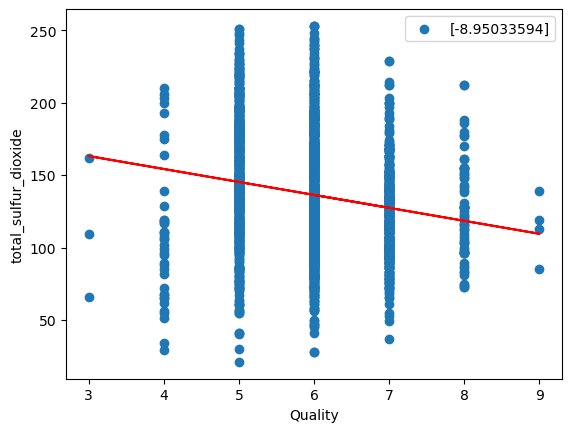

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


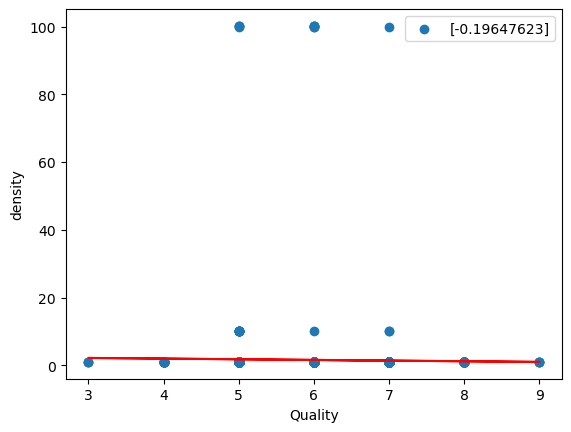

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


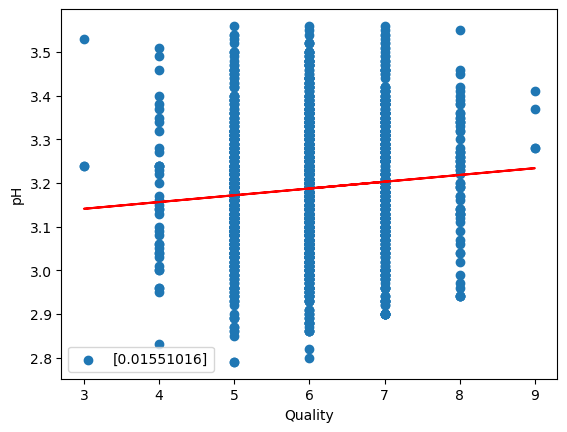

C:\Users\13148\anaconda3\envs\mlenv\lib\site-packages\matplotlib\text.py:1223: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


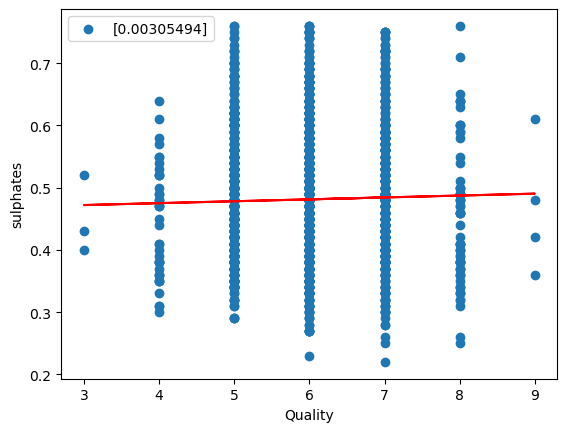

{'fixed_acidity': array([[-0.0471773]]),
 'volatile_acidity': array([[-0.01104745]]),
 'citric_acid': array([[0.00325178]]),
 'residual_sugar': array([[-0.76241198]]),
 'chlorides': array([[-0.00353463]]),
 'free_sulfur_dioxide': array([[-0.23074755]]),
 'total_sulfur_dioxide': array([[-8.95033594]]),
 'density': array([[-0.19647623]]),
 'pH': array([[0.01551016]]),
 'sulphates': array([[0.00305494]])}

In [6]:
#create function that calculates linear regression for all of the vairables
def linear_regression_calc():
    variables = df.columns[0:10]
    correlations = {}
    
    for var in variables:
        
        #define x and y
        X = df['quality']
        y = df[var]
        
        #reshape x 
        X_reshape = X.values.reshape(-1,1)
        y_reshape = y.values.reshape(-1,1)
        
        #fit model
        model = LinearRegression()
        model.fit(X_reshape, y_reshape)
        
        
        y_pred = model.predict(X_reshape)
        
        #plot
        plt.scatter(X_reshape, y_reshape)
        plt.plot(X_reshape, y_pred, color='red')
        plt.ylabel(var)
        plt.xlabel("Quality")
        plt.legend(model.coef_)
        plt.show()
        
        #append variable and correlation coef to "correlations" dict
        correlations[var] = model.coef_
        
    return correlations
linear_regression_calc()